In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.cluster import KMeans
import plotly
import plotly.graph_objs as go

df1 = pd.read_csv('/content/AusOpen-men-2013.csv')
df2 = pd.read_csv('/content/AusOpen-women-2013.csv')
df3 = pd.read_csv('/content/FrenchOpen-men-2013.csv')
df4 = pd.read_csv('/content/USOpen-men-2013.csv')
df5 = pd.read_csv('/content/USOpen-women-2013.csv')
df6 = pd.read_csv('/content/FrenchOpen-women-2013.csv')
df7 = pd.read_csv('/content/Wimbledon-men-2013.csv')
df8 = pd.read_csv("/content/Wimbledon-women-2013.csv")

df1 = df1.fillna(0)
df2 = df2.fillna(0)
df3 = df3.fillna(0)
df4 = df4.fillna(0)
df5 = df4.fillna(0)
df6 = df6.fillna(0)
df7 = df7.fillna(0)
df8 = df8.fillna(0)

# Q 1.
Suppose there is a match between 2 players, can we predict who is going to win.

---

In [ ]:
player1_df = df1.groupby('Player1').size().reset_index(name='Matches').rename(columns={'Player1': 'Player'})
player2_df = df1.groupby('Player2').size().reset_index(name='Matches').rename(columns={'Player2': 'Player'})

player_matches_df = pd.concat([player1_df, player2_df], ignore_index=True).groupby('Player').sum().reset_index()

print(player_matches_df.to_markdown())

|     | Player                 |   Matches |
|----:|:-----------------------|----------:|
|   0 | Adrian Mannarino       |         2 |
|   1 | Albert Montanes        |         1 |
|   2 | Albert Ramos           |         1 |
|   3 | Alejandro Falla        |         2 |
|   4 | Alejandro Gonzalez     |         1 |
|   5 | Aleksandr Nedovyesov   |         1 |
|   6 | Alex Bogomolov Jr.     |         1 |
|   7 | Alexandr Dolgopolov    |         2 |
|   8 | Aljaz Bedene           |         1 |
|   9 | Andreas Seppi          |         2 |
|  10 | Andrey Golubev         |         1 |
|  11 | Andy Murray            |         5 |
|  12 | Benjamin Becker        |         1 |
|  13 | Benoit Paire           |         3 |
|  14 | Bernard Tomic          |         1 |
|  15 | Blaz Kavcic            |         2 |
|  16 | Blaz Rola              |         2 |
|  17 | Bradley Klahn          |         1 |
|  18 | Carlos Berlocq         |         1 |
|  19 | Damir Dzumhur          |         3 |
|  20 | Da

we had taken the best players in termes of maximum number of matches played so  that data is also clear

In [ ]:
Rogerdf = pd.DataFrame()
Rafaeldf = pd.DataFrame()

for index, row in df1.iterrows():
    if row['Player1'] == 'Roger Federer':
        Rogerdf = Rogerdf.append({'FSP': row['FSP.1'], 
                              'FSW': row['FSW.1'], 
                              'SSP': row['SSP.1'], 
                              'SSW': row['SSW.1'], 
                              'ACE': row['ACE.1'], 
                              'DBF': row['DBF.1'], 
                              'WNR': row['WNR.1'], 
                              'UFE': row['UFE.1'], 
                              'BPC': row['BPC.1'], 
                              'BPW': row['BPW.1'], 
                              'NPA': row['NPA.1'], 
                              'NPW': row['NPW.1'], 
                              'TPW': row['TPW.1'], 
                              'ST1': row['ST1.1'], 
                              'ST2': row['ST2.1'], 
                              'ST3': row['ST3.1'], 
                              'ST4': row['ST4.1'], 
                              'ST5': row['ST5.1']}, ignore_index=True)

    elif row['Player2'] == 'Roger Federer':
        Rogerdf = Rogerdf.append({'FSP': row['FSP.2'], 
                              'FSW': row['FSW.2'],
                              'FSP': row['FSP.2'],
                              'FSW': row['FSW.2'],
                              'SSP': row['SSP.2'],
                              'SSW': row['SSW.2'],
                              'ACE': row['ACE.2'],
                              'DBF': row['DBF.2'],
                              'WNR': row['WNR.2'],
                              'UFE': row['UFE.2'],
                              'BPC': row['BPC.2'],
                              'BPW': row['BPW.2'],
                              'NPA': row['NPA.2'],
                              'NPW': row['NPW.2'],
                              'TPW': row['TPW.2'],
                              'ST1': row['ST1.2'],
                              'ST2': row['ST2.2'],
                              'ST3': row['ST3.2'],
                              'ST4': row['ST4.2'],
                              'ST5': row['ST5.2']}, ignore_index=True)



for index, row in df1.iterrows():
    if row['Player1'] == 'Rafael Nadal':
        Rafaeldf = Rafaeldf.append({'FSP': row['FSP.1'], 
                              'FSW': row['FSW.1'], 
                              'SSP': row['SSP.1'], 
                              'SSW': row['SSW.1'], 
                              'ACE': row['ACE.1'], 
                              'DBF': row['DBF.1'], 
                              'WNR': row['WNR.1'], 
                              'UFE': row['UFE.1'], 
                              'BPC': row['BPC.1'], 
                              'BPW': row['BPW.1'], 
                              'NPA': row['NPA.1'], 
                              'NPW': row['NPW.1'], 
                              'TPW': row['TPW.1'], 
                              'ST1': row['ST1.1'], 
                              'ST2': row['ST2.1'], 
                              'ST3': row['ST3.1'], 
                              'ST4': row['ST4.1'], 
                              'ST5': row['ST5.1']}, ignore_index=True)

    elif row['Player2'] == 'Rafael Nadal':
        Rafaeldf = Rafaeldf.append({'FSP': row['FSP.2'], 
                              'FSW': row['FSW.2'],
                              'FSP': row['FSP.2'],
                              'FSW': row['FSW.2'],
                              'SSP': row['SSP.2'],
                              'SSW': row['SSW.2'],
                              'ACE': row['ACE.2'],
                              'DBF': row['DBF.2'],
                              'WNR': row['WNR.2'],
                              'UFE': row['UFE.2'],
                              'BPC': row['BPC.2'],
                              'BPW': row['BPW.2'],
                              'NPA': row['NPA.2'],
                              'NPW': row['NPW.2'],
                              'TPW': row['TPW.2'],
                              'ST1': row['ST1.2'],
                              'ST2': row['ST2.2'],
                              'ST3': row['ST3.2'],
                              'ST4': row['ST4.2'],
                              'ST5': row['ST5.2']}, ignore_index=True)

<ipython-input-751-ee56749c875f>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-751-ee56749c875f>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-751-ee56749c875f>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-751-ee56749c875f>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-751-ee56749c875f>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-751-ee56749c875f>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi

In [ ]:
mean_row = Rogerdf.mean(axis=0)
Rogerdf.loc['mean'] = mean_row

mean_row = Rafaeldf.mean(axis=0)
Rafaeldf.loc['mean'] = mean_row

display(Rogerdf)
display(Rafaeldf)

,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,58.000000,40.000000,42.000000,19.000000,11.000000,5.000000,30.000000,17.0,4.000000,17.000000,18.000000,22.000000,96.0,6.0,6.000000,6.000000,0.0,0.0
1,76.000000,45.000000,24.000000,9.000000,11.000000,0.000000,52.000000,35.0,6.000000,11.000000,23.000000,29.000000,103.0,6.0,6.000000,7.000000,0.0,0.0
2,62.000000,39.000000,38.000000,16.000000,6.000000,1.000000,35.000000,18.0,5.000000,14.000000,11.000000,20.000000,98.0,6.0,6.000000,6.000000,0.0,0.0
3,57.000000,42.000000,43.000000,25.000000,7.000000,1.000000,43.000000,21.0,3.000000,7.000000,34.000000,41.000000,100.0,6.0,7.000000,6.000000,0.0,0.0
4,64.000000,61.000000,36.000000,28.000000,10.000000,0.000000,54.000000,42.0,4.000000,17.000000,49.000000,66.000000,147.0,6.0,6.000000,6.000000,6.0,0.0
5,66.000000,45.000000,34.000000,18.000000,8.000000,1.000000,34.000000,50.0,1.000000,2.000000,23.000000,42.000000,86.0,6.0,3.000000,3.000000,0.0,0.0
mean,63.833333,45.333333,36.166667,19.166667,8.833333,1.333333,41.333333,30.5,3.833333,11.333333,26.333333,36.666667,105.0,6.0,5.666667,5.666667,1.0,0.0


,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,62.0,14.000000,38.0,6.0,5.000000,1.0,13.000000,5.000000,1.000000,1.000000,5.000000,5.0,30.000000,6.000000,0.000000,0.000000,0.000000,0.0
1,74.0,45.000000,26.0,11.0,7.000000,1.0,39.000000,19.000000,5.000000,10.000000,11.000000,14.0,91.000000,6.000000,6.000000,6.000000,0.000000,0.0
2,67.0,38.000000,33.0,20.0,2.000000,0.0,21.000000,18.000000,6.000000,12.000000,9.000000,13.0,107.000000,6.000000,6.000000,6.000000,0.000000,0.0
3,71.0,67.000000,29.0,14.0,12.000000,1.0,36.000000,28.000000,5.000000,8.000000,10.000000,19.0,129.000000,7.000000,7.000000,7.000000,0.000000,0.0
4,73.0,66.000000,27.0,22.0,3.000000,7.0,42.000000,47.000000,4.000000,11.000000,32.000000,36.0,147.000000,3.000000,7.000000,7.000000,6.000000,0.0
5,65.0,41.000000,35.0,22.0,3.000000,1.0,28.000000,25.000000,4.000000,14.000000,3.000000,10.0,105.000000,7.000000,6.000000,6.000000,0.000000,0.0
6,78.0,50.000000,22.0,10.0,1.000000,3.0,19.000000,32.000000,2.000000,6.000000,5.000000,8.0,88.000000,3.000000,2.000000,6.000000,3.000000,0.0
mean,70.0,45.857143,30.0,15.0,4.714286,2.0,28.285714,24.857143,3.857143,8.857143,10.714286,15.0,99.571429,5.428571,4.857143,5.428571,1.285714,0.0


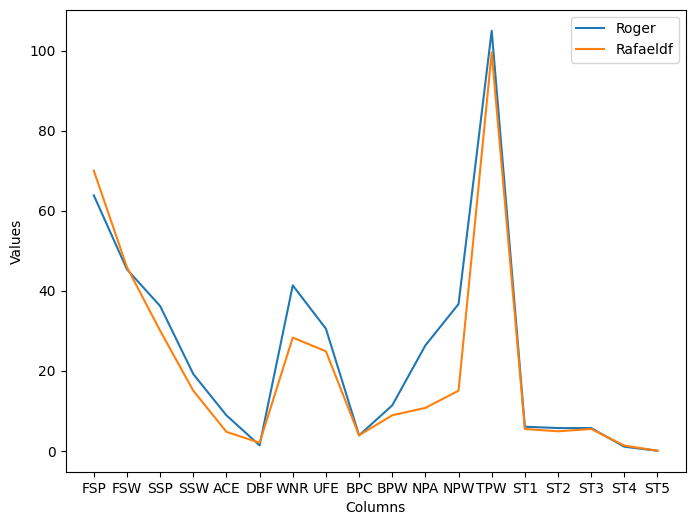

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
x = Rogerdf.columns
y1 = Rogerdf.iloc[6]
y2 = Rafaeldf.iloc[7]
ax.plot(x, y1, label='Roger')
ax.plot(x, y2, label='Rafaeldf')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.legend()
plt.show()

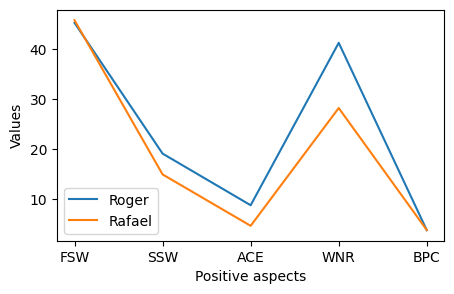

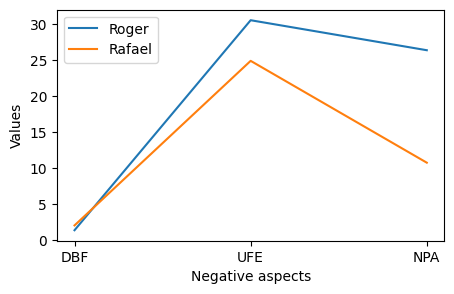

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
x1 = ['FSW', 'SSW', 'ACE', 'WNR', 'BPC']
y1_1 = Rogerdf.iloc[6, [1, 3, 4, 6, 8]]
y1_2 = Rafaeldf.iloc[7, [1, 3, 4, 6, 8]]
ax.plot(x1, y1_1, label='Roger')
ax.plot(x1, y1_2, label='Rafael')
ax.set_xlabel('Positive aspects')
ax.set_ylabel('Values')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(5,3))
x2 = ['DBF', 'UFE', 'NPA']
y2_1 = Rogerdf.iloc[6, [5, 7, 10]]
y2_2 = Rafaeldf.iloc[7, [5, 7, 10]]
ax.plot(x2, y2_1, label='Roger')
ax.plot(x2, y2_2, label='Rafael')
ax.set_xlabel('Negative aspects')
ax.set_ylabel('Values')
ax.legend()
plt.show()

through the plot it is not clear as Roger has made positve points also more and also negative points therefore we need to make formula and one with more score will be the best one and will have more probability of wining

In [ ]:
def formula(FSW,SSW,ACE,BPC,TPW,WNR,DBF,UFE,NPA):
  return (1*FSW)+(2*SSW)+(3*ACE)+(2*BPC)+(2*TPW)+(1*WNR)-((3*DBF)+(3*UFE)+(2*NPA))

print('Score of Roger is',formula(Rogerdf['FSW']['mean'], Rogerdf['SSW']['mean'], Rogerdf['ACE']['mean'], Rogerdf['BPC']['mean'], Rogerdf['TPW']['mean'], Rogerdf['WNR']['mean'], Rogerdf['DBF']['mean'], Rogerdf['UFE']['mean'], Rogerdf['NPA']['mean']))
print('Score of Rafael is',formula(Rafaeldf['FSW']['mean'], Rafaeldf['SSW']['mean'], Rafaeldf['ACE']['mean'], Rafaeldf['BPC']['mean'], Rafaeldf['TPW']['mean'], Rafaeldf['WNR']['mean'], Rafaeldf['DBF']['mean'], Rafaeldf['UFE']['mean'], Rafaeldf['NPA']['mean']))

Score of Roger is 221.00000000000003
Score of Rafael is 223.1428571428571


In [ ]:
scale = MinMaxScaler()
scale.fit(Rogerdf)
Rogerdf = scale.transform(Rogerdf)

scale.fit(Rafaeldf)
Rafaeldf = scale.transform(Rafaeldf)

print('Score of Roger is',formula(Rogerdf[6][1], Rogerdf[6][3], Rogerdf[6][4], Rogerdf[6][8], Rogerdf[6][12], Rogerdf[6][6], Rogerdf[6][5], Rogerdf[6][7], Rogerdf[6][10]))
print('Score of Rafael is',formula(Rafaeldf[7][1], Rafaeldf[7][3], Rafaeldf[7][4], Rafaeldf[7][8], Rafaeldf[7][12], Rafaeldf[7][6], Rafaeldf[7][5], Rafaeldf[7][7], Rafaeldf[7][10]))

Score of Roger is 2.45227033057059
Score of Rafael is 2.790741199759231


# Q 2.
Form a strategy for a player to play against a specific player.

---

In [ ]:
player1_df = df2.groupby('Player1').size().reset_index(name='Matches').rename(columns={'Player1': 'Player'})
player2_df = df2.groupby('Player2').size().reset_index(name='Matches').rename(columns={'Player2': 'Player'})

player_matches_df = pd.concat([player1_df, player2_df], ignore_index=True).groupby('Player').sum().reset_index()

print(player_matches_df.to_markdown())

|     | Player                     |   Matches |
|----:|:---------------------------|----------:|
|   0 | Agnieszka Radwanska        |         6 |
|   1 | Ajla Tomljanovic           |         2 |
|   2 | Alexandra Cadantu          |         1 |
|   3 | Alison Riske               |         3 |
|   4 | Alison Van Uytvanck        |         1 |
|   5 | Alize Cornet               |         3 |
|   6 | Alla Kudryavtseva          |         2 |
|   7 | Ana Ivanovic               |         5 |
|   8 | Ana Konjuh                 |         1 |
|   9 | Anabel Medina Garrigues    |         1 |
|  10 | Anastasia Pavlyuchenkova   |         3 |
|  11 | Andrea Petkovic            |         1 |
|  12 | Angelique Kerber           |         4 |
|  13 | Anna Schmiedlova           |         2 |
|  14 | Anna Tatishvili            |         1 |
|  15 | Annika Beck                |         2 |
|  16 | Ashleigh Barty             |         1 |
|  17 | Ayumi Morita               |         2 |
|  18 | Barbora Zahl

In [ ]:
Player = pd.DataFrame()
Opponent = pd.DataFrame()

for index, row in df2.iterrows():
    if row['Player1'] == 'Dominika Cibulkova':
        Player = Player.append({'FSP': row['FSP.1'], 
                              'FSW': row['FSW.1'], 
                              'SSP': row['SSP.1'], 
                              'SSW': row['SSW.1'], 
                              'ACE': row['ACE.1'], 
                              'DBF': row['DBF.1'], 
                              'WNR': row['WNR.1'], 
                              'UFE': row['UFE.1'], 
                              'BPC': row['BPC.1'], 
                              'BPW': row['BPW.1'], 
                              'NPA': row['NPA.1'], 
                              'NPW': row['NPW.1'], 
                              'TPW': row['TPW.1'], 
                              'ST1': row['ST1.1'], 
                              'ST2': row['ST2.1'], 
                              'ST3': row['ST3.1'], 
                              'ST4': row['ST4.1'], 
                              'ST5': row['ST5.1']}, ignore_index=True)

    elif row['Player2'] == 'Dominika Cibulkova':
        Player = Player.append({'FSP': row['FSP.2'], 
                              'FSW': row['FSW.2'],
                              'FSP': row['FSP.2'],
                              'FSW': row['FSW.2'],
                              'SSP': row['SSP.2'],
                              'SSW': row['SSW.2'],
                              'ACE': row['ACE.2'],
                              'DBF': row['DBF.2'],
                              'WNR': row['WNR.2'],
                              'UFE': row['UFE.2'],
                              'BPC': row['BPC.2'],
                              'BPW': row['BPW.2'],
                              'NPA': row['NPA.2'],
                              'NPW': row['NPW.2'],
                              'TPW': row['TPW.2'],
                              'ST1': row['ST1.2'],
                              'ST2': row['ST2.2'],
                              'ST3': row['ST3.2'],
                              'ST4': row['ST4.2'],
                              'ST5': row['ST5.2']}, ignore_index=True)



for index, row in df2.iterrows():
    if row['Player1'] == 'Na Li':
        Opponent = Opponent.append({'FSP': row['FSP.1'], 
                              'FSW': row['FSW.1'], 
                              'SSP': row['SSP.1'], 
                              'SSW': row['SSW.1'], 
                              'ACE': row['ACE.1'], 
                              'DBF': row['DBF.1'], 
                              'WNR': row['WNR.1'], 
                              'UFE': row['UFE.1'], 
                              'BPC': row['BPC.1'], 
                              'BPW': row['BPW.1'], 
                              'NPA': row['NPA.1'], 
                              'NPW': row['NPW.1'], 
                              'TPW': row['TPW.1'], 
                              'ST1': row['ST1.1'], 
                              'ST2': row['ST2.1'], 
                              'ST3': row['ST3.1'], 
                              'ST4': row['ST4.1'], 
                              'ST5': row['ST5.1']}, ignore_index=True)

    elif row['Player2'] == 'Na Li':
        Opponent = Opponent.append({'FSP': row['FSP.2'], 
                              'FSW': row['FSW.2'],
                              'FSP': row['FSP.2'],
                              'FSW': row['FSW.2'],
                              'SSP': row['SSP.2'],
                              'SSW': row['SSW.2'],
                              'ACE': row['ACE.2'],
                              'DBF': row['DBF.2'],
                              'WNR': row['WNR.2'],
                              'UFE': row['UFE.2'],
                              'BPC': row['BPC.2'],
                              'BPW': row['BPW.2'],
                              'NPA': row['NPA.2'],
                              'NPW': row['NPW.2'],
                              'TPW': row['TPW.2'],
                              'ST1': row['ST1.2'],
                              'ST2': row['ST2.2'],
                              'ST3': row['ST3.2'],
                              'ST4': row['ST4.2'],
                              'ST5': row['ST5.2']}, ignore_index=True)

<ipython-input-758-4887aece3ccb>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-758-4887aece3ccb>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-758-4887aece3ccb>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-758-4887aece3ccb>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-758-4887aece3ccb>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-758-4887aece3ccb>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version

In [ ]:
Opponent = Opponent.fillna(0)
Player = Player.fillna(0)

display(Player)
display(Opponent)

,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,61.0,33.0,39.0,14.0,0.0,6.0,21.0,30.0,3.0,7.0,6.0,7.0,72.0,6.0,6.0,0.0,0.0,0.0
1,68.0,21.0,32.0,8.0,0.0,2.0,17.0,13.0,6.0,9.0,4.0,5.0,55.0,6.0,6.0,0.0,0.0,0.0
2,69.0,21.0,31.0,8.0,1.0,1.0,20.0,20.0,5.0,9.0,7.0,9.0,56.0,6.0,6.0,0.0,0.0,0.0
3,69.0,27.0,31.0,13.0,1.0,5.0,16.0,28.0,7.0,14.0,2.0,2.0,87.0,3.0,6.0,6.0,0.0,0.0
4,77.0,25.0,23.0,5.0,0.0,3.0,17.0,16.0,5.0,9.0,3.0,4.0,54.0,6.0,6.0,0.0,0.0,0.0
5,64.0,22.0,36.0,10.0,0.0,2.0,21.0,20.0,6.0,9.0,12.0,14.0,63.0,6.0,6.0,0.0,0.0,0.0
6,67.0,29.0,33.0,5.0,0.0,7.0,11.0,28.0,2.0,3.0,3.0,4.0,58.0,6.0,0.0,0.0,0.0,0.0


,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,76.0,24.0,24.0,7.0,3.0,0.0,20.0,18.0,5.0,12.0,13.0,19.0,61.0,6.0,6.0,0.0,0.0,0.0
1,60.0,27.0,40.0,12.0,4.0,2.0,30.0,31.0,5.0,7.0,2.0,5.0,67.0,6.0,7.0,0.0,0.0,0.0
2,60.0,43.0,40.0,18.0,5.0,6.0,17.0,50.0,4.0,10.0,8.0,9.0,99.0,1.0,7.0,6.0,0.0,0.0
3,80.0,26.0,20.0,4.0,1.0,1.0,18.0,14.0,5.0,7.0,8.0,14.0,55.0,6.0,6.0,0.0,0.0,0.0
4,64.0,23.0,36.0,10.0,1.0,1.0,23.0,17.0,5.0,8.0,7.0,10.0,62.0,6.0,6.0,0.0,0.0,0.0
5,61.0,27.0,39.0,11.0,4.0,5.0,35.0,23.0,6.0,10.0,11.0,14.0,71.0,6.0,6.0,0.0,0.0,0.0
6,60.0,21.0,40.0,15.0,2.0,3.0,34.0,30.0,5.0,10.0,8.0,13.0,75.0,7.0,6.0,0.0,0.0,0.0


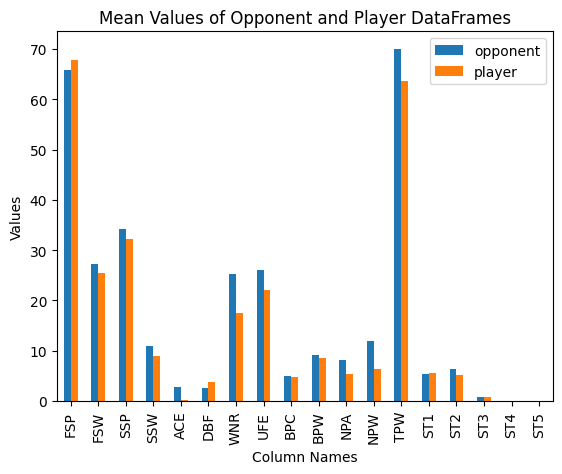

In [ ]:
mean_opponent = Opponent.mean()
mean_player = Player.mean()

df_mean = pd.DataFrame({'opponent': mean_opponent, 'player': mean_player})

df_mean.plot(kind='bar')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title('Mean Values of Opponent and Player DataFrames')
plt.show()

In [ ]:
scale = MinMaxScaler()
scale.fit(Opponent)
Opponent = scale.transform(Opponent)

scale.fit(Player)
Player = scale.transform(Player)

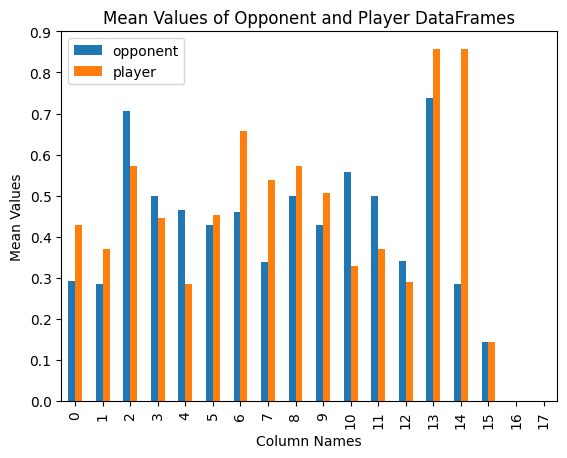

In [ ]:
mean_opponent = np.mean(Opponent, axis=0)
mean_player = np.mean(Player, axis=0)

df_mean = pd.DataFrame({'opponent': mean_opponent, 'player': mean_player})

df_mean.plot(kind='bar')
plt.xlabel('Column Names')
plt.ylabel('Mean Values')
plt.title('Mean Values of Opponent and Player DataFrames')
plt.show()

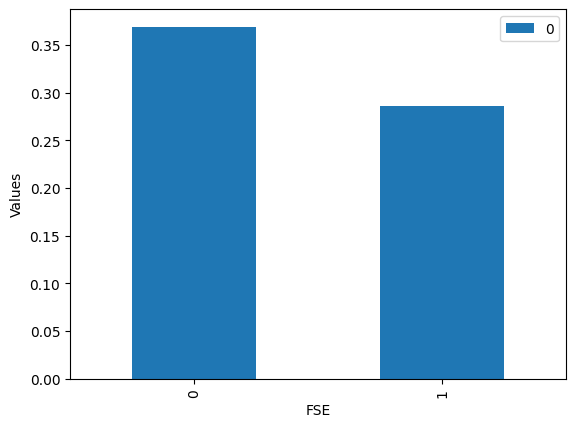

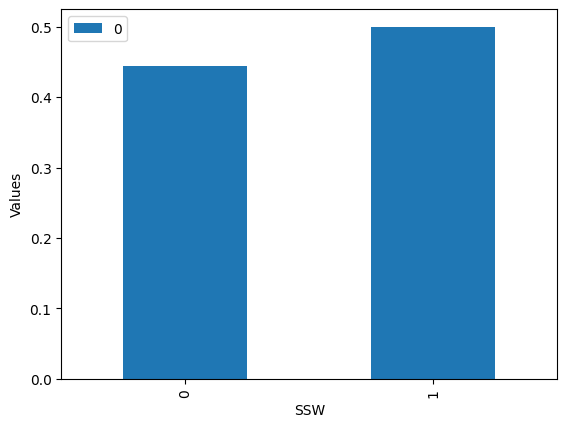

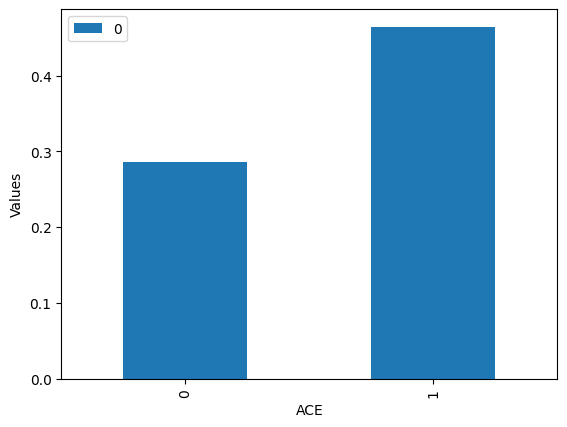

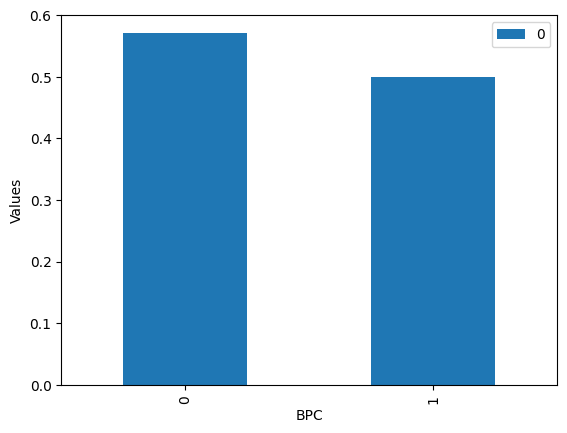

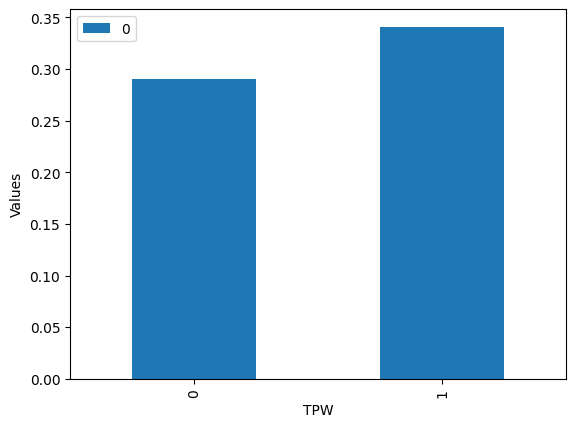

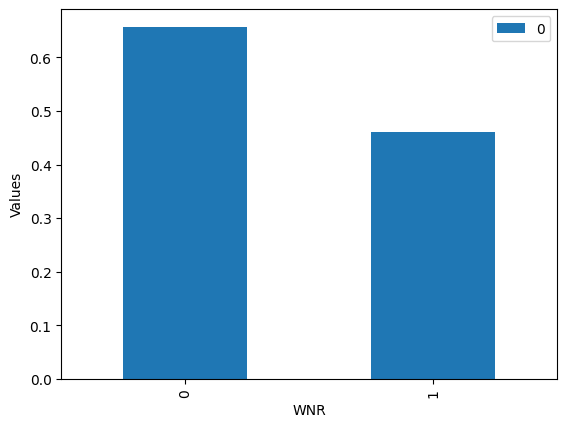

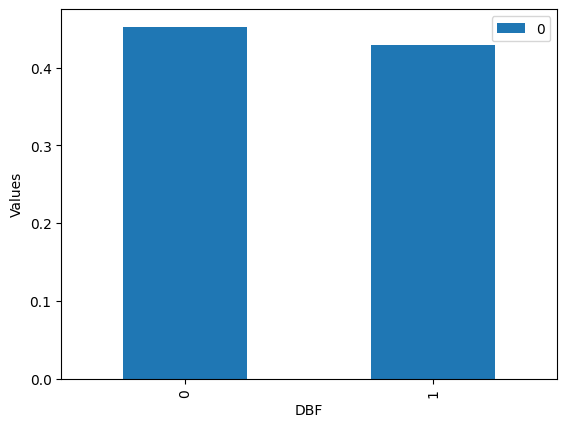

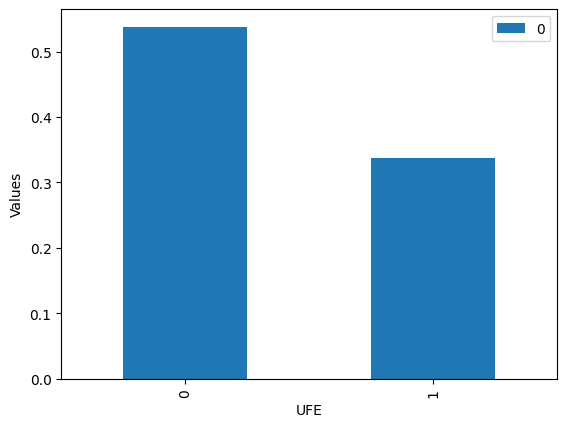

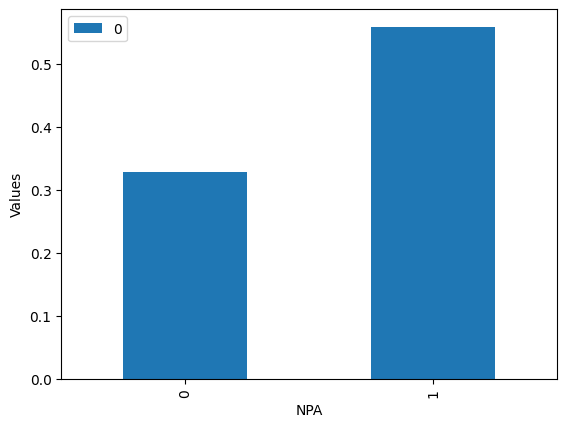

In [ ]:
indices = [1, 3, 4, 8, 12, 6]
names = ['FSE', 'SSW', 'ACE', 'BPC', 'TPW', 'WNR']
count = 0
for i in indices:
    a = np.mean(Player[:, i])
    b = np.mean(Opponent[:, i])
    df = pd.DataFrame({a,b})
    df.plot(kind='bar')
    plt.xlabel(names[count])
    plt.ylabel('Values')
    plt.show()
    count = count + 1 

indices = [5, 7, 10]
names = ['DBF', 'UFE', 'NPA']
count = 0
for i in indices:
    a = np.mean(Player[:, i])
    b = np.mean(Opponent[:, i])
    df = pd.DataFrame({a,b})
    df.plot(kind='bar')
    plt.xlabel(names[count])
    plt.ylabel('Values')
    plt.show()
    count = count + 1 

# Q 3.
How can we make recommendations to a viewer based on preferable matches of that specific viewer.

---

In [ ]:
df3

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,...,7,7,14,18,88,6,6,6.0,0.0,0.0
1,Somdev Devvarman,Daniel Munoz-De La Nava,1,1,3,0,62,54,38,22,...,1,16,22,25,106,3,3,5.0,0.0,0.0
2,Tobias Kamke,Paolo Lorenzi,1,1,3,2,62,53,38,15,...,10,18,19,27,139,3,3,6.0,6.0,3.0
3,Julien Benneteau,Ricardas Berankis,1,1,3,1,72,87,28,19,...,4,13,33,43,149,6,3,7.0,6.0,0.0
4,Lukas Lacko,Sam Querrey,1,0,0,3,52,31,48,22,...,4,7,12,13,93,6,6,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Rafael Nadal,Stanislas Wawrinka,5,1,3,0,75,40,25,11,...,1,5,16,30,64,2,3,1.0,0.0,0.0
121,Novak Djokovic,Tommy Haas,5,1,3,0,64,41,36,22,...,2,2,2,17,84,3,6,5.0,0.0,0.0
122,David Ferrer,Jo-Wilfried Tsonga,6,1,3,0,60,35,40,23,...,2,5,7,16,84,1,6,2.0,0.0,0.0
123,Novak Djokovic,Rafael Nadal,6,0,2,3,67,76,33,30,...,8,16,15,26,177,6,3,6.0,6.0,9.0


In [ ]:
new_df = df3.iloc[:, 2:].copy()

k means

In [ ]:
num_clusters = 5
km = KMeans(num_clusters)
predicted = km.fit_predict(new_df)
predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 4, 2, 1, 3, 2, 4, 0, 4, 3, 2, 1, 3, 2, 3, 0, 4, 3, 4, 1, 4,
       4, 3, 1, 1, 3, 2, 0, 3, 3, 2, 0, 4, 0, 1, 1, 4, 4, 4, 0, 3, 3, 1,
       1, 1, 3, 4, 3, 4, 4, 1, 1, 3, 3, 4, 0, 1, 4, 0, 1, 2, 1, 0, 2, 1,
       3, 0, 2, 1, 3, 0, 4, 4, 4, 1, 2, 4, 4, 0, 1, 4, 3, 4, 3, 4, 3, 2,
       4, 2, 3, 0, 1, 3, 0, 4, 4, 3, 1, 1, 1, 2, 1, 4, 4, 4, 3, 2, 1, 3,
       4, 3, 0, 2, 2, 3, 3, 4, 3, 0, 3, 3, 3, 2, 3], dtype=int32)

dividing data

In [ ]:
listx1 = df3.values.tolist()

count=0
for i in predicted:
  listx1[count].append(i)
  count = count + 1 

lis1=[]
lis2=[]
lis3=[]
lis4=[]
lis5=[]
j=0
i=0

for i in listx1:
  if i[42]==0:
    lis1.append(listx1[j])
  elif i[42]==1:
    lis2.append(listx1[j])
  elif i[42]==2:
    lis3.append(listx1[j])
  elif i[42]==3:
    lis4.append(listx1[j])
  elif i[42]==4:
    lis5.append(listx1[j])
  j= j + 1

arr1 = np.array(lis1)
arr2 = np.array(lis2)
arr3 = np.array(lis3)
arr4 = np.array(lis4)
arr5 = np.array(lis5)

df = pd.DataFrame(arr2)
print(df)

                        0                        1  2  3  4  5   6   7   8   \
0         Somdev Devvarman  Daniel Munoz-De La Nava  1  1  3  0  62  54  38   
1              Lukas Lacko              Sam Querrey  1  0  0  3  52  31  48   
2          Benjamin Becker            Jeremy Chardy  1  0  0  3  66  48  34   
3          Illya Marchenko           Kevin Anderson  1  0  0  3  60  39  40   
4    Andreas Haider-Maurer          Nicolas Almagro  1  0  1  3  65  50  35   
5             Martin Alund   Edouard Roger-Vasselin  1  0  1  3  57  31  43   
6            Florian Mayer            Denis Istomin  1  0  1  2  59  40  41   
7             Albert Ramos           Jerzy Janowicz  1  0  0  3  61  41  39   
8             Benoit Paire         Marcos Baghdatis  1  1  2  1  46  40  54   
9             Andreas Beck            Fabio Fognini  1  0  0  3  55  37  45   
10               Pere Riba              Lukas Rosol  1  0  0  3  60  38  40   
11          Carlos Berlocq               John Isner 

# Q 4. 
How can we choose players for a match so that the match becomes interesting and competitive.

---

In [ ]:
player1_df = df4.groupby('Player1').agg({
    'BPW.1': 'mean',
    'NPA.1': 'mean',
    'NPW.1': 'mean',
    'TPW.1': 'mean',
    'ST1.1': 'mean',
    'ST2.1': 'mean',
    'ST3.1': 'mean',
    'ST4.1': 'mean',
    'ST5.1': 'mean',
    'FSP.2': 'mean',
    'FSW.2': 'mean',
    'SSP.2': 'mean',
    'SSW.2': 'mean',
    'ACE.2': 'mean',
    'DBF.2': 'mean',
    'WNR.2': 'mean',
    'UFE.2': 'mean',
    'BPC.2': 'mean',
    'BPW.2': 'mean',
    'NPA.2': 'mean',
    'NPW.2': 'mean',
    'TPW.2': 'mean',
    'ST1.2': 'mean',
    'ST2.2': 'mean',
    'ST3.2': 'mean',
    'ST4.2': 'mean',
    'ST5.2': 'mean'
}).reset_index().rename(columns={'Player1': 'Player'})

player2_df = df4.groupby('Player2').agg({
    'BPW.1': 'mean',
    'NPA.1': 'mean',
    'NPW.1': 'mean',
    'TPW.1': 'mean',
    'ST1.1': 'mean',
    'ST2.1': 'mean',
    'ST3.1': 'mean',
    'ST4.1': 'mean',
    'ST5.1': 'mean',
    'FSP.2': 'mean',
    'FSW.2': 'mean',
    'SSP.2': 'mean',
    'SSW.2': 'mean',
    'ACE.2': 'mean',
    'DBF.2': 'mean',
    'WNR.2': 'mean',
    'UFE.2': 'mean',
    'BPC.2': 'mean',
    'BPW.2': 'mean',
    'NPA.2': 'mean',
    'NPW.2': 'mean',
    'TPW.2': 'mean',
    'ST1.2': 'mean',
    'ST2.2': 'mean',
    'ST3.2': 'mean',
    'ST4.2': 'mean',
    'ST5.2': 'mean'
}).reset_index().rename(columns={'Player2': 'Player'})

player_matches_df = pd.concat([player1_df, player2_df], ignore_index=True).groupby('Player').sum().reset_index()

In [ ]:
new_df = player_matches_df.iloc[:, 2:].copy()

new_clusters = 5
km = KMeans(new_clusters)
predicted3d = km.fit_predict(new_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
num_clusters = 5
km = KMeans(num_clusters)
predicted = km.fit_predict(new_df)
listx1 = player_matches_df.values.tolist()

count=0
for i in predicted:
  listx1[count].append(i)
  count = count + 1 

lis1=[]
lis2=[]
lis3=[]
lis4=[]
lis5=[]
j=0
i=0

for i in listx1:
  if i[28]==0:
    lis1.append(listx1[j])
  elif i[28]==1:
    lis2.append(listx1[j])
  elif i[28]==2:
    lis3.append(listx1[j])
  elif i[28]==3:
    lis4.append(listx1[j])
  elif i[28]==4:
    lis5.append(listx1[j])
  j= j + 1

arr1 = np.array(lis1)
arr2 = np.array(lis2)
arr3 = np.array(lis3)
arr4 = np.array(lis4)
arr5 = np.array(lis5)

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=arr1[:, 0], y=arr1[:, 1], z=arr1[:, 2], marker=dict(size=5), mode='markers', name='cluster 1'))
fig.add_trace(go.Scatter3d(x=arr2[:, 0], y=arr2[:, 1], z=arr2[:, 2], marker=dict(size=5), mode='markers', name='cluster 2'))
fig.add_trace(go.Scatter3d(x=arr3[:, 0], y=arr3[:, 1], z=arr3[:, 2], marker=dict(size=5), mode='markers', name='cluster 3'))
fig.add_trace(go.Scatter3d(x=arr4[:, 0], y=arr4[:, 1], z=arr4[:, 2], marker=dict(size=5), mode='markers', name='cluster 4'))
fig.add_trace(go.Scatter3d(x=arr5[:, 0], y=arr5[:, 1], z=arr5[:, 2], marker=dict(size=5), mode='markers', name='cluster 5'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
from sklearn.decomposition import PCA

pc = PCA(n_components = 3)
reduced_df = pc.fit_transform(new_df)

In [ ]:
listx1 = reduced_df.tolist()

count=0
for i in predicted3d:
  listx1[count].append(i)
  count = count + 1 

lis1=[]
lis2=[]
lis3=[]
lis4=[]
lis5=[]
j=0
i=0

for i in listx1:
  if i[3]==0:
    lis1.append(listx1[j])
  elif i[3]==1:
    lis2.append(listx1[j])
  elif i[3]==2:
    lis3.append(listx1[j])
  elif i[3]==3:
    lis4.append(listx1[j])
  elif i[3]==4:
    lis5.append(listx1[j])
  j=j+1

arr1 = np.array(lis1)
arr2 = np.array(lis2)
arr3 = np.array(lis3)
arr4 = np.array(lis4)
arr5 = np.array(lis5)

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=arr1[:, 0], y=arr1[:, 1], z=arr1[:, 2], marker=dict(size=5), mode='markers', name='cluster 1'))
fig.add_trace(go.Scatter3d(x=arr2[:, 0], y=arr2[:, 1], z=arr2[:, 2], marker=dict(size=5), mode='markers', name='cluster 2'))
fig.add_trace(go.Scatter3d(x=arr3[:, 0], y=arr3[:, 1], z=arr3[:, 2], marker=dict(size=5), mode='markers', name='cluster 3'))
fig.add_trace(go.Scatter3d(x=arr4[:, 0], y=arr4[:, 1], z=arr4[:, 2], marker=dict(size=5), mode='markers', name='cluster 4'))
fig.add_trace(go.Scatter3d(x=arr5[:, 0], y=arr5[:, 1], z=arr5[:, 2], marker=dict(size=5), mode='markers', name='cluster 5'))

fig.show()

# Q 5.
Can we group tennis players based on their playing style, and then use this information to predict which group is most likely to succeed against another group in a match?

---


In [ ]:
player1 = df5.groupby('Player1').agg({
    'BPW.1': 'mean',
    'NPA.1': 'mean',
    'NPW.1': 'mean',
    'TPW.1': 'mean',
    'ST1.1': 'mean',
    'ST2.1': 'mean',
    'ST3.1': 'mean',
    'ST4.1': 'mean',
    'ST5.1': 'mean',
    'FSP.2': 'mean',
    'FSW.2': 'mean',
    'SSP.2': 'mean',
    'SSW.2': 'mean',
    'ACE.2': 'mean',
    'DBF.2': 'mean',
    'WNR.2': 'mean',
    'UFE.2': 'mean',
    'BPC.2': 'mean',
    'BPW.2': 'mean',
    'NPA.2': 'mean',
    'NPW.2': 'mean',
    'TPW.2': 'mean',
    'ST1.2': 'mean',
    'ST2.2': 'mean',
    'ST3.2': 'mean',
    'ST4.2': 'mean',
    'ST5.2': 'mean'
}).reset_index().rename(columns={'Player1': 'Player'})

player2 = df5.groupby('Player2').agg({
    'BPW.1': 'mean',
    'NPA.1': 'mean',
    'NPW.1': 'mean',
    'TPW.1': 'mean',
    'ST1.1': 'mean',
    'ST2.1': 'mean',
    'ST3.1': 'mean',
    'ST4.1': 'mean',
    'ST5.1': 'mean',
    'FSP.2': 'mean',
    'FSW.2': 'mean',
    'SSP.2': 'mean',
    'SSW.2': 'mean',
    'ACE.2': 'mean',
    'DBF.2': 'mean',
    'WNR.2': 'mean',
    'UFE.2': 'mean',
    'BPC.2': 'mean',
    'BPW.2': 'mean',
    'NPA.2': 'mean',
    'NPW.2': 'mean',
    'TPW.2': 'mean',
    'ST1.2': 'mean',
    'ST2.2': 'mean',
    'ST3.2': 'mean',
    'ST4.2': 'mean',
    'ST5.2': 'mean'
}).reset_index().rename(columns={'Player2': 'Player'})

player_matches = pd.concat([player1, player2], ignore_index=True).groupby('Player').sum().reset_index()
# print(player_matches.to_markdown())

In [ ]:
new_df = player_matches.iloc[:, 2:].copy()

new_clusters = 5
km = KMeans(new_clusters)
predicted = km.fit_predict(new_df)
predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 2, 2, 2, 1, 0, 3, 4, 3, 4, 4, 4, 2, 3, 1, 0, 1, 4, 1, 2, 1, 3,
       2, 1, 4, 3, 3, 2, 2, 3, 3, 4, 3, 2, 1, 1, 2, 4, 1, 4, 2, 2, 2, 4,
       1, 3, 1, 4, 4, 3, 1, 3, 1, 1, 4, 0, 3, 4, 2, 4, 3, 2, 1, 2, 2, 4,
       4, 2, 1, 2, 4, 0, 1, 4, 2, 0, 3, 1, 2, 3, 2, 2, 4, 3, 0, 1, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 3, 4, 2, 1, 2, 4, 2, 4, 2, 1,
       1, 4, 1, 0, 3, 1, 2, 2, 2, 0, 4, 2, 2, 3, 4, 4, 4, 3], dtype=int32)

In [ ]:
player_matches['predicted'] = predicted

In [ ]:
player_matches['TPW'] = player_matches['TPW.1'] + player_matches['TPW.2']

In [ ]:
sorted_player_matches = player_matches.sort_values(by='TPW', ascending=False)

In [ ]:
f20 = sorted_player_matches.head(20)
display(f20)

,Player,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,...,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,predicted,TPW
5,Alex Bogomolov Jr.,37.000000,60.000000,82.000000,364.000000,11.000000,12.000000,10.000000,11.000000,10.0,...,49.0,86.000000,350.000000,10.0,9.000000,8.00,11.000000,13.0,0,714.000000
119,Tim Smyczek,30.500000,55.500000,78.500000,313.000000,9.500000,12.000000,12.000000,8.500000,6.5,...,51.5,85.000000,299.500000,9.0,10.000000,4.00,9.500000,9.5,0,612.500000
15,Bernard Tomic,26.000000,44.000000,63.000000,282.000000,9.000000,9.000000,12.000000,9.000000,3.0,...,60.0,81.000000,298.000000,7.0,9.000000,11.00,13.000000,6.0,0,580.000000
29,Dudi Sela,31.000000,0.000000,0.000000,257.000000,10.000000,7.000000,8.000000,7.000000,4.0,...,0.0,0.000000,289.000000,13.0,12.000000,12.00,5.000000,6.0,3,546.000000
75,Marcel Granollers,24.000000,44.500000,69.500000,276.000000,5.500000,10.000000,12.000000,9.000000,11.5,...,57.5,100.500000,266.500000,12.0,9.500000,2.50,9.000000,11.5,0,542.500000
71,Lleyton Hewitt,29.000000,39.000000,64.000000,272.500000,10.500000,9.000000,10.500000,10.000000,6.5,...,48.0,79.500000,267.500000,8.0,13.000000,9.50,10.000000,3.0,0,540.000000
8,Andreas Haider-Maurer,27.000000,0.000000,0.000000,250.000000,10.000000,7.000000,11.000000,6.000000,4.0,...,0.0,0.000000,265.000000,9.0,12.000000,8.00,7.000000,6.0,3,515.000000
26,Denis Kudla,19.000000,12.000000,15.000000,226.000000,8.000000,8.000000,10.000000,5.000000,0.0,...,12.0,24.000000,281.000000,13.0,13.000000,12.00,7.000000,0.0,3,507.000000
55,Janko Tipsarevic,20.666667,34.666667,57.000000,235.000000,10.333333,11.666667,6.666667,6.666667,0.0,...,41.0,51.666667,271.333333,12.0,9.333333,13.00,9.000000,0.0,0,506.333333
0,Adrian Mannarino,16.000000,37.500000,57.000000,256.500000,13.000000,12.000000,10.000000,6.500000,0.0,...,19.5,33.000000,244.500000,9.5,9.000000,11.00,7.000000,0.0,3,501.000000


# Q 6.
Plot an 6d plot for common entries?


---

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

df6['FNL'] = df6['FNL.1'] + df6['FNL.1']

markersize = df6['FNL']*10
markercolor = df6['Round']

plots = go.Scatter3d(x=df6['Player1'], y=df6['Player2'], z=df6['Result'],
    mode='markers',
    marker=dict(size=markersize, color=markercolor, colorscale='Blues', opacity=0.8))

fig = go.Figure(data=[plots])

iplot(fig)

# Q 7.
Can we calculate the number of tough matches and easiest matches?


---


<Axes: xlabel='diff'>

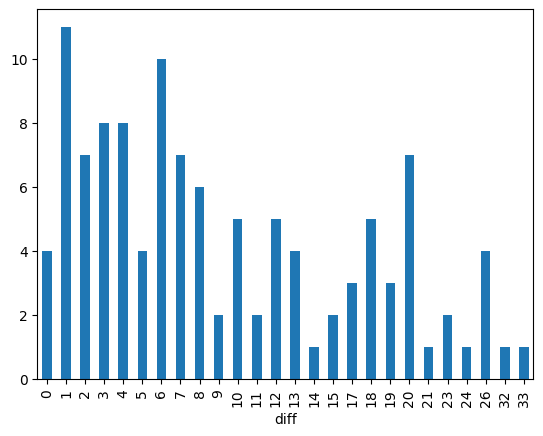

In [ ]:
df7["diff"]=(df7["NPW.1"] - df7["NPW.2"]).abs()

data=df7.groupby("diff")
data=data["diff"]
data=data.count()
data.plot(kind="bar")

# Q 8.
Is there a significant difference in the number of games won by the first player versus second player in a match?

---

In [ ]:
# df8.columns

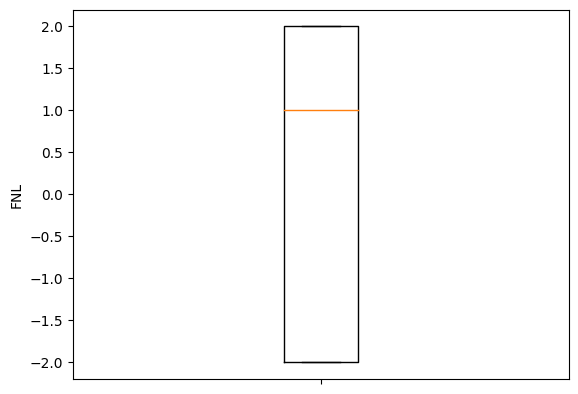

In [ ]:
df8['FNL'] = df8['FNL.1'] - df8['FNL.2']
fig, ax = plt.subplots()
ax.boxplot(df8['FNL'])
ax.set_ylabel('FNL')
ax.set_xticklabels([''])
plt.show()